In [153]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
train = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Training_Data').drop(['Unnamed: 6' , 'Unnamed: 7' ,'Attribute Information:'] , axis = 1)
colInfo = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Information')
test = pd.read_excel(r'C:\Users\Emincan\Desktop\ML-Projects\datasets-master-a6fa39d2490c3afd5b5eb24b6f250c13fe8b4f5a\User Knowledge Modeling\Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls' , sheet_name= 'Test_Data').drop(['Unnamed: 6' , 'Unnamed: 7' ,'Attribute Information:'] , axis = 1)

train.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [155]:
test.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.10,0.50,0.26,0.05,Very Low
1,0.05,0.05,0.55,0.60,0.14,Low
2,0.08,0.18,0.63,0.60,0.85,High
3,0.20,0.20,0.68,0.67,0.85,High
4,0.22,0.22,0.90,0.30,0.90,High


In [156]:
colInfo

,Data Set Characteristics: Multivariate,Unnamed: 1,Attribute Information:
0,Number of Instances: 403,NaN,STG (The degree of study time for goal object ...
1,Area: Education,NaN,SCG (The degree of repetition number of user f...
2,Attribute Characteristics: Real,NaN,STR (The degree of study time of user for rela...
3,Number of Attributes: 5,NaN,LPR (The exam performance of user for related ...
4,Associated Tasks: Classification,NaN,PEG (The exam performance of user for goal obj...
5,NaN,NaN,UNS (The knowledge level of user)
6,Class Distribution,NaN,NaN
7,Very Low: 50,NaN,NaN
8,Low:129,NaN,NaN
9,Middle: 122,NaN,NaN


In [157]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     258 non-null    float64
 1   SCG     258 non-null    float64
 2   STR     258 non-null    float64
 3   LPR     258 non-null    float64
 4   PEG     258 non-null    float64
 5    UNS    258 non-null    object 
dtypes: float64(5), object(1)
memory usage: 12.2+ KB


In [158]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
STG,258.0,0.371147,0.210271,0.0,0.24075,0.3270,0.4950,0.99
SCG,258.0,0.355674,0.211962,0.0,0.21000,0.3025,0.4975,0.90
STR,258.0,0.468004,0.245940,0.0,0.29125,0.4900,0.6900,0.95
LPR,258.0,0.432713,0.248108,0.0,0.25000,0.3300,0.6475,0.99
PEG,258.0,0.458539,0.255211,0.0,0.25000,0.5000,0.6600,0.93


In [159]:
train[' UNS'].value_counts()

Middle      88
Low         83
High        63
very_low    24
Name:  UNS, dtype: int64

In [160]:
train.rename(columns = {'PEG' : 'ExamNote' , 'LPR' : 'RealatedExamNotes' , 'STG': 'StudyTime' , 'STR' : 'RealatedStudyTime' , 'SCG' : 'Repeats' , ' UNS' : 'Knowledge'} , inplace=True)
test.rename(columns = {'PEG' : 'ExamNote' , 'LPR' : 'RealatedExamNotes' , 'STG': 'StudyTime' , 'STR' : 'RealatedStudyTime' , 'SCG' : 'Repeats' , ' UNS' : 'Knowledge'} , inplace=True)

In [161]:
train.head()

,StudyTime,Repeats,RealatedStudyTime,RealatedExamNotes,ExamNote,Knowledge
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [162]:
train['Knowledge'].replace(['very_low' , 'Low' , 'Middle' , 'High'] , [0 , 1,  2, 3] , inplace=True)
test['Knowledge'].replace(['very_low' , 'Very Low' ,  'Low' , 'Middle' , 'High'] , [0 , 0 , 1,  2, 3] , inplace=True)
train.head()

,StudyTime,Repeats,RealatedStudyTime,RealatedExamNotes,ExamNote,Knowledge
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


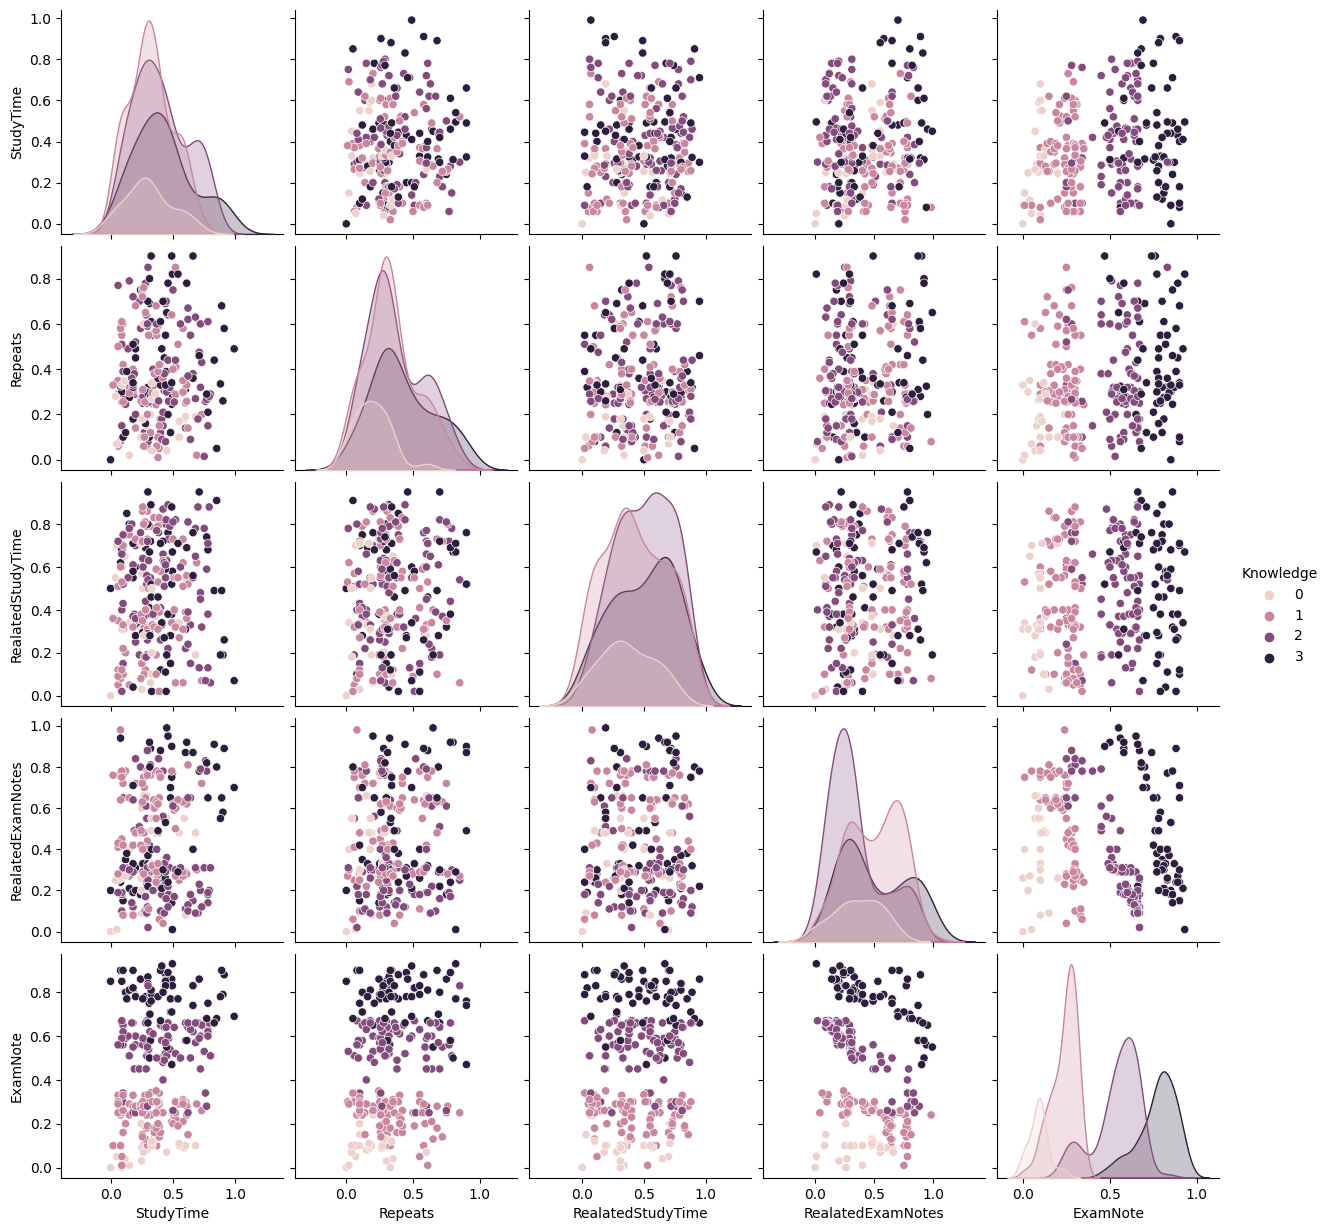

In [163]:
sns.pairplot(train , hue = 'Knowledge');

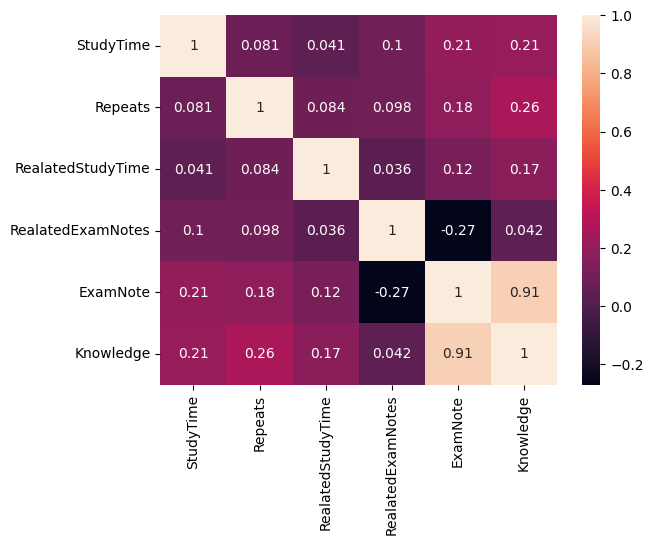

In [164]:
sns.heatmap(train.corr() , annot=True);

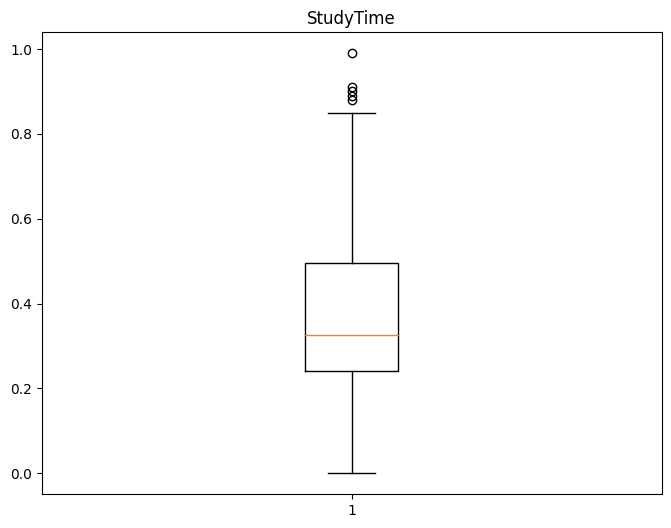

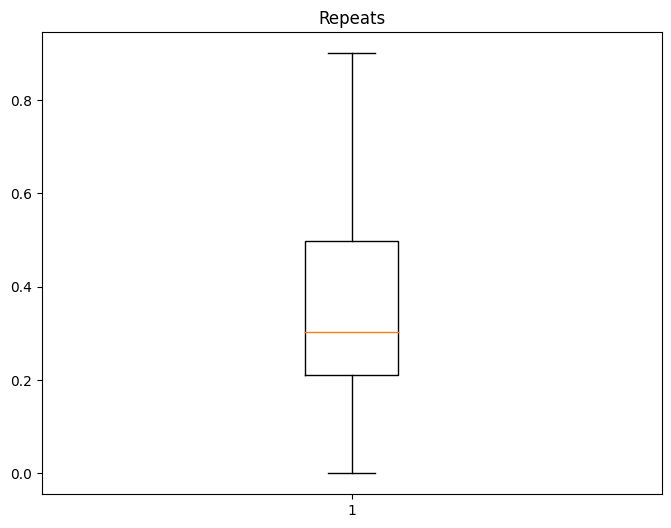

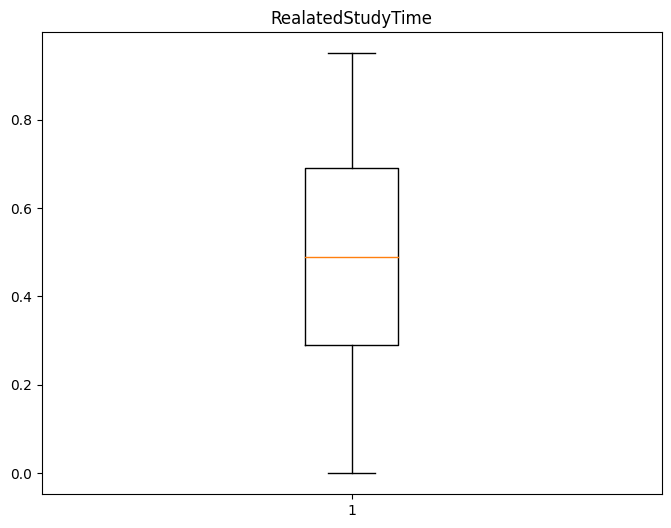

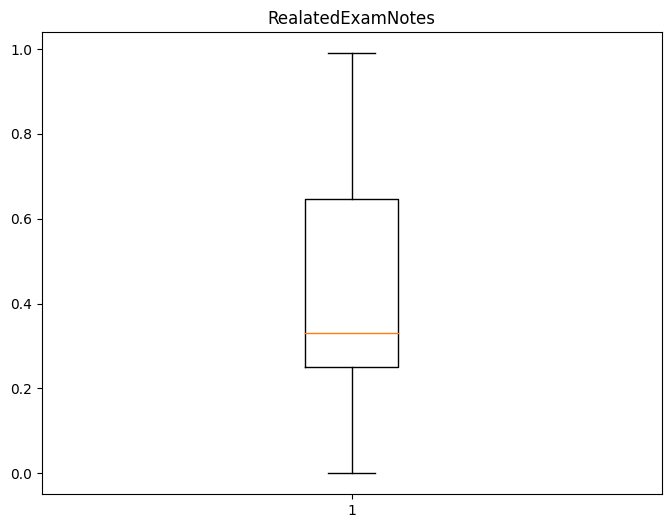

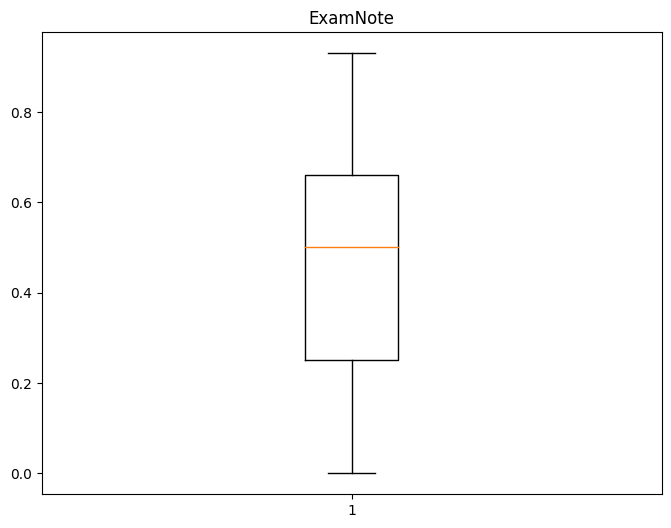

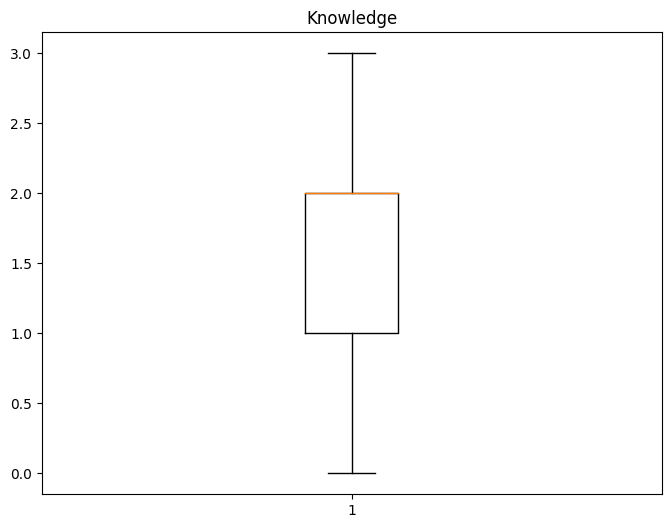

In [165]:
import matplotlib.pyplot as plt

# df veri çerçevesindeki her sütun için boxplot oluşturma
for col in train.columns:
    plt.figure(figsize=(8,6))
    plt.boxplot(train[col] , whis = 1.5)
    plt.title(col)
    plt.show()

# Modelling

### Train | Test Split

In [166]:
train.shape[0]

258

In [167]:
test.shape[0]

145

In [168]:
fulldata = pd.concat([train , test] , axis = 0)
fulldata

,StudyTime,Repeats,RealatedStudyTime,RealatedExamNotes,ExamNote,Knowledge
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1
...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,3
141,0.85,0.82,0.66,0.83,0.83,3
142,0.56,0.60,0.77,0.13,0.32,1
143,0.66,0.68,0.81,0.57,0.57,2


In [169]:
fulldata['Knowledge'].value_counts()

1    129
2    122
3    102
0     50
Name: Knowledge, dtype: int64

In [170]:
from sklearn.model_selection import train_test_split

X = fulldata.drop('Knowledge' ,axis = 1)
y = fulldata['Knowledge']
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 , random_state=53)

### Eval Metric

In [171]:
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
def eval_metric(y_train, y_train_pred, y_test, y_pred, i):
    
    print(f"Test_Set {i}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"Train_Set {i}")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Compare Models

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

## Gaussian NaiveBayes Model Building

In [174]:
from sklearn.naive_bayes import GaussianNB

In [175]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [176]:
print(nb.score(X_train,y_train))
print(nb.score(X_test,y_test))

0.9099378881987578
0.8888888888888888


In [177]:
nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_test)

eval_metric(y_train , nb_train_pred , y_test , nb_pred , 'NaiveBayes')

Test_Set NaiveBayes
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  7 18  1]
 [ 0  0  1 22]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.75      1.00      0.86        21
           2       0.95      0.69      0.80        26
           3       0.96      0.96      0.96        23

    accuracy                           0.89        81
   macro avg       0.91      0.91      0.90        81
weighted avg       0.91      0.89      0.89        81


Train_Set NaiveBayes
[[ 35   4   0   0]
 [  2 105   1   0]
 [  0  15  80   1]
 [  0   0   6  73]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        39
           1       0.85      0.97      0.91       108
           2       0.92      0.83      0.87        96
           3       0.99      0.92      0.95        79

    accuracy                           0.91       322
   macro avg       0.92      0.91      0.91       322
weigh

In [26]:
nb_df = train_val(y_train , nb_train_pred , y_test , nb_pred , 'NaiveBayes')
nb_df

,NaiveBayes_train,NaiveBayes_test
R2,0.905674,0.891647
mae,0.090062,0.111111
mse,0.090062,0.111111
rmse,0.300104,0.333333


## DecisionTree Model Building

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)

DecisionTreeClassifier()

In [29]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.9012345679012346


In [30]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=6)

In [31]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.9813664596273292
0.9259259259259259


In [32]:
dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_test)

eval_metric(y_train , dt_train_pred , y_test , dt_pred , 'DecisionTree')

Test_Set DecisionTree
[[10  1  0  0]
 [ 0 21  0  0]
 [ 0  3 22  1]
 [ 0  0  1 22]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.84      1.00      0.91        21
           2       0.96      0.85      0.90        26
           3       0.96      0.96      0.96        23

    accuracy                           0.93        81
   macro avg       0.94      0.93      0.93        81
weighted avg       0.93      0.93      0.93        81


Train_Set DecisionTree
[[ 36   3   0   0]
 [  0 108   0   0]
 [  0   3  93   0]
 [  0   0   0  79]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        39
           1       0.95      1.00      0.97       108
           2       1.00      0.97      0.98        96
           3       1.00      1.00      1.00        79

    accuracy                           0.98       322
   macro avg       0.99      0.97      0.98       322
w

In [33]:
dt_df = train_val(y_train , dt_train_pred , y_test , dt_pred , 'DecisionTree')
dt_df

,DecisionTree_train,DecisionTree_test
R2,0.980484,0.927765
mae,0.018634,0.074074
mse,0.018634,0.074074
rmse,0.136505,0.272166


In [34]:
compare_df = pd.concat([nb_df , dt_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test
R2,0.905674,0.891647,0.980484,0.927765
mae,0.090062,0.111111,0.018634,0.074074
mse,0.090062,0.111111,0.018634,0.074074
rmse,0.300104,0.333333,0.136505,0.272166


### KNN Model Building

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8944099378881988
0.9506172839506173


In [38]:
knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_test)

eval_metric(y_train , knn_train_pred , y_test , knn_pred , 'KNeighbors')

Test_Set KNeighbors
[[10  1  0  0]
 [ 0 21  0  0]
 [ 0  2 23  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.88      1.00      0.93        21
           2       1.00      0.88      0.94        26
           3       0.96      1.00      0.98        23

    accuracy                           0.95        81
   macro avg       0.96      0.95      0.95        81
weighted avg       0.96      0.95      0.95        81


Train_Set KNeighbors
[[ 29  10   0   0]
 [  3 104   1   0]
 [  0  15  80   1]
 [  0   0   4  75]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.81      0.96      0.88       108
           2       0.94      0.83      0.88        96
           3       0.99      0.95      0.97        79

    accuracy                           0.89       322
   macro avg       0.91      0.87      0.89       322
weigh

In [39]:
knn_df = train_val(y_train , knn_train_pred , y_test , knn_pred , 'KNeighbors')
knn_df

,KNeighbors_train,KNeighbors_test
R2,0.889411,0.951843
mae,0.105590,0.049383
mse,0.105590,0.049383
rmse,0.324946,0.222222


In [40]:
compare_df = pd.concat([compare_df , knn_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222


## LogisticRegression Model Building

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression(random_state=53)
log.fit(X_train , y_train)

LogisticRegression(random_state=53)

In [43]:
print(log.score(X_train,y_train))
print(log.score(X_test,y_test))

0.8416149068322981
0.7777777777777778


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
log_base = LogisticRegression(random_state=53 , max_iter=1000)

params = {'penalty' : ['l1' , 'l2'] , 'C' : [0.001 , 0.01 , 0.1 , 1 , 3, 5, 10 ,25, 50 , 100 , 200 , 300 , 500 ,750] ,
          'solver' : ['lbfgs' , 'liblinear']}

log_rd = RandomizedSearchCV(log_base , params , n_iter=50 , scoring='accuracy')
log_rd.fit(X_train,y_train)

c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Emincan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Emincan\AppData\Local\Prog

RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=53),
                   n_iter=50,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 3, 5, 10, 25,
                                              50, 100, 200, 300, 500, 750],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   scoring='accuracy')

In [46]:
log_rd.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 200}

In [47]:
log = LogisticRegression(random_state=53 , solver = 'lbfgs' , penalty='l2' , C=200 )
log.fit(X_train , y_train)

LogisticRegression(C=200, random_state=53)

In [48]:
print(log.score(X_train,y_train))
print(log.score(X_test,y_test))

0.9751552795031055
0.9753086419753086


In [49]:
log_train_pred = log.predict(X_train)
log_pred = log.predict(X_test)

eval_metric(y_train , log_train_pred , y_test , log_pred , 'LogisticRegression')

Test_Set LogisticRegression
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  1 24  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        26
           3       0.96      1.00      0.98        23

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81


Train_Set LogisticRegression
[[ 37   2   0   0]
 [  1 106   1   0]
 [  0   3  93   0]
 [  0   0   1  78]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.95      0.98      0.97       108
           2       0.98      0.97      0.97        96
           3       1.00      0.99      0.99        79

    accuracy                           0.98       322
   macro avg       0.98      0.97      0.97

In [50]:
log_df = train_val(y_train , log_train_pred , y_test , log_pred , 'LogisticRegression')
log_df

,LogisticRegression_train,LogisticRegression_test
R2,0.973979,0.975922
mae,0.024845,0.024691
mse,0.024845,0.024691
rmse,0.157622,0.157135


In [51]:
compare_df = pd.concat([compare_df , log_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test,LogisticRegression_train,LogisticRegression_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843,0.973979,0.975922
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222,0.157622,0.157135


## SVC Model Building

In [52]:
from sklearn.svm import SVC

In [53]:
from sklearn.model_selection import GridSearchCV

svc_base = SVC(random_state= 53)

params = {'kernel' : ['linear' , 'poly' , 'rbf' , 'sigmoid'] , 'degree' : [2,3,4,5] , 'gamma' : ['scale' , 'auto'] , 'C' : np.arange(0.01,100,5) }

svc_grid = GridSearchCV(svc_base , params , scoring='accuracy' , cv = 3 )
svc_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=53),
             param_grid={'C': array([1.000e-02, 5.010e+00, 1.001e+01, 1.501e+01, 2.001e+01, 2.501e+01,
       3.001e+01, 3.501e+01, 4.001e+01, 4.501e+01, 5.001e+01, 5.501e+01,
       6.001e+01, 6.501e+01, 7.001e+01, 7.501e+01, 8.001e+01, 8.501e+01,
       9.001e+01, 9.501e+01]),
                         'degree': [2, 3, 4, 5], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [54]:
svc_grid.best_estimator_

SVC(C=50.01, degree=2, kernel='linear', random_state=53)

In [55]:
svc_grid.best_score_

0.9689050421137648

In [56]:
svc = SVC(random_state=53 , C= 50 , degree= 2 , kernel= 'linear')
svc.fit(X_train,y_train)

SVC(C=50, degree=2, kernel='linear', random_state=53)

In [57]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.9720496894409938
0.9753086419753086


In [58]:
svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_test)

eval_metric(y_train , svc_train_pred , y_test , svc_pred , 'SVC')

Test_Set SVC
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  1 24  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        26
           3       0.96      1.00      0.98        23

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81


Train_Set SVC
[[ 37   2   0   0]
 [  1 107   0   0]
 [  0   5  91   0]
 [  0   0   1  78]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.94      0.99      0.96       108
           2       0.99      0.95      0.97        96
           3       1.00      0.99      0.99        79

    accuracy                           0.97       322
   macro avg       0.98      0.97      0.97       322
weighted avg       

In [59]:
svc_df = train_val(y_train , svc_train_pred , y_test , svc_pred , 'SVC')
svc_df

,SVC_train,SVC_test
R2,0.970726,0.975922
mae,0.027950,0.024691
mse,0.027950,0.024691
rmse,0.167183,0.157135


In [60]:
compare_df = pd.concat([compare_df , svc_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test,LogisticRegression_train,LogisticRegression_test,SVC_train,SVC_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843,0.973979,0.975922,0.970726,0.975922
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222,0.157622,0.157135,0.167183,0.157135


### YSA Modeli Oluşturma

In [74]:
y_train.nunique()

4

In [81]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# y_train ve y_test verilerini One-Hot Encoding'e dönüştürme
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# YSA modelini oluşturma ve eğitme
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=50, batch_size=1, validation_data=(X_test, y_test_encoded))

Epoch 1/50
322/322 [==============================] - 1s 2ms/step - loss: 1.3173 - accuracy: 0.4658 - val_loss: 1.2758 - val_accuracy: 0.4568
Epoch 2/50
322/322 [==============================] - 0s 1ms/step - loss: 1.2112 - accuracy: 0.5062 - val_loss: 1.1583 - val_accuracy: 0.5185
Epoch 3/50
322/322 [==============================] - 0s 1ms/step - loss: 1.0757 - accuracy: 0.5683 - val_loss: 1.0304 - val_accuracy: 0.5432
Epoch 4/50
322/322 [==============================] - 0s 1ms/step - loss: 0.9433 - accuracy: 0.6056 - val_loss: 0.9077 - val_accuracy: 0.6543
Epoch 5/50
322/322 [==============================] - 0s 1ms/step - loss: 0.8264 - accuracy: 0.7081 - val_loss: 0.8008 - val_accuracy: 0.6914
Epoch 6/50
322/322 [==============================] - 0s 1ms/step - loss: 0.7262 - accuracy: 0.7329 - val_loss: 0.6866 - val_accuracy: 0.7160
Epoch 7/50
322/322 [==============================] - 0s 1ms/step - loss: 0.6414 - accuracy: 0.7919 - val_loss: 0.6059 - val_accuracy: 0.7407
Epoch 

In [82]:
model.evaluate(X_train, y_train_encoded)[1]
model.evaluate(X_test, y_test_encoded)[1]

3/3 [==============================] - 0s 4ms/step - loss: 0.1402 - accuracy: 0.9753


0.9753086566925049

In [84]:
from sklearn.metrics import classification_report

model_train_pred = model.predict(X_train)
model_pred = model.predict(X_test)

print("Train set classification report:\n", classification_report(y_train_encoded.argmax(axis=1), model_train_pred.argmax(axis=1)))
print("Test set classification report:\n", classification_report(y_test_encoded.argmax(axis=1), model_pred.argmax(axis=1)))

3/3 [==============================] - 0s 2ms/step
Train set classification report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.94      0.97      0.95       108
           2       0.99      0.94      0.96        96
           3       1.00      0.99      0.99        79

    accuracy                           0.97       322
   macro avg       0.96      0.97      0.97       322
weighted avg       0.97      0.97      0.97       322

Test set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.95      1.00      0.98        21
           2       1.00      0.92      0.96        26
           3       0.96      1.00      0.98        23

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81



In [86]:
model_df = train_val(y_train_encoded , model_train_pred , y_test_encoded , model_pred , 'Model')
model_df

,Model_train,Model_test
R2,0.933998,0.932649
mae,0.033264,0.027662
mse,0.012100,0.013472
rmse,0.110001,0.116070


In [87]:
compare_df = pd.concat([compare_df , model_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test,LogisticRegression_train,LogisticRegression_test,SVC_train,SVC_test,Model_train,Model_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843,0.973979,0.975922,0.970726,0.975922,0.933998,0.932649
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.033264,0.027662
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.012100,0.013472
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222,0.157622,0.157135,0.167183,0.157135,0.110001,0.116070


### GradientBoosting Model Building

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=53)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=5, random_state=53)

In [98]:
print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))

1.0
0.9506172839506173


In [100]:
gb_base = GradientBoostingClassifier(random_state=53)

params = {'learning_rate' : [0.001 , 0.01 , 0.1 , 1] , 'n_estimators' : [80,100,150,200,300,500] , 'subsample' : [0.5 , 0.8 , 1],
          'min_samples_split' : [2,3,4,5] , 'max_depth' : [2,3,4,5,6,7] , 'max_features' : [2,3,4,5,6]}

gb_grid = GridSearchCV(gb_base , params , scoring = 'accuracy' , cv = 3)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=53),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 100, 150, 200, 300, 500],
                         'subsample': [0.5, 0.8, 1]},
             scoring='accuracy')

In [101]:
print(gb_grid.score(X_train,y_train))
print(gb_grid.score(X_test,y_test))

1.0
0.9382716049382716


In [128]:
gb = GradientBoostingClassifier(random_state=53 , learning_rate=0.01 , n_estimators=100 , max_depth=6 , max_features=3)
gb.fit(X_train, y_train)

print(gb.score(X_train,y_train))
print(gb.score(X_test,y_test))

0.9968944099378882
0.9506172839506173


In [129]:
gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_test)

eval_metric(y_train , gb_train_pred , y_test , gb_pred , 'GB')

Test_Set GB
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  3 22  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        21
           2       1.00      0.85      0.92        26
           3       0.96      1.00      0.98        23

    accuracy                           0.95        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.95      0.95        81


Train_Set GB
[[ 39   0   0   0]
 [  0 108   0   0]
 [  0   1  95   0]
 [  0   0   0  79]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.99      1.00      1.00       108
           2       1.00      0.99      0.99        96
           3       1.00      1.00      1.00        79

    accuracy                           1.00       322
   macro avg       1.00      1.00      1.00       322
weighted avg       1.

In [130]:
gb_df = train_val(y_train , gb_train_pred , y_test , gb_pred , 'GB')
gb_df

,GB_train,GB_test
R2,0.996747,0.951843
mae,0.003106,0.049383
mse,0.003106,0.049383
rmse,0.055728,0.222222


In [131]:
compare_df = pd.concat([compare_df , gb_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test,LogisticRegression_train,LogisticRegression_test,SVC_train,SVC_test,Model_train,Model_test,GB_train,GB_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843,0.973979,0.975922,0.970726,0.975922,0.933998,0.932649,0.996747,0.951843
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.033264,0.027662,0.003106,0.049383
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.012100,0.013472,0.003106,0.049383
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222,0.157622,0.157135,0.167183,0.157135,0.110001,0.116070,0.055728,0.222222


### RandomForest Model Building

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
rf_base = RandomForestClassifier(random_state=53)

params = {'n_estimators' : [80,100,150,200], 'max_depth' : np.arange(2,11) , 'min_samples_split' : np.arange(2,6) , 'max_features' : [2,3,4,5]}

rf_grid = GridSearchCV(rf_base , params , scoring='accuracy' , cv = 3)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=53),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [2, 3, 4, 5],
                         'min_samples_split': array([2, 3, 4, 5]),
                         'n_estimators': [80, 100, 150, 200]},
             scoring='accuracy')

In [135]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=5, max_features=5, random_state=53)

In [136]:
rf_grid.best_score_

0.9471558786200531

In [137]:
print(rf_grid.score(X_train,y_train))
print(rf_grid.score(X_test,y_test))

0.9751552795031055
0.9259259259259259


In [148]:
rf = RandomForestClassifier(random_state=53 , n_estimators=100 , max_depth=5 , max_features=3 , min_samples_split=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=3, random_state=53)

In [149]:
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.968944099378882
0.9506172839506173


In [150]:
rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_test)

eval_metric(y_train , rf_train_pred , y_test , rf_pred , 'RF')

Test_Set RF
[[11  0  0  0]
 [ 0 21  0  0]
 [ 0  3 22  1]
 [ 0  0  0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        21
           2       1.00      0.85      0.92        26
           3       0.96      1.00      0.98        23

    accuracy                           0.95        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.95      0.95        81


Train_Set RF
[[ 35   4   0   0]
 [  0 108   0   0]
 [  0   5  91   0]
 [  0   0   1  78]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        39
           1       0.92      1.00      0.96       108
           2       0.99      0.95      0.97        96
           3       1.00      0.99      0.99        79

    accuracy                           0.97       322
   macro avg       0.98      0.96      0.97       322
weighted avg       0.

In [151]:
rf_df = train_val(y_train , rf_train_pred , y_test , rf_pred , 'RF')
rf_df

,RF_train,RF_test
R2,0.967474,0.951843
mae,0.031056,0.049383
mse,0.031056,0.049383
rmse,0.176227,0.222222


In [152]:
compare_df = pd.concat([compare_df , rf_df] , axis = 1)
compare_df

,NaiveBayes_train,NaiveBayes_test,DecisionTree_train,DecisionTree_test,KNeighbors_train,KNeighbors_test,LogisticRegression_train,LogisticRegression_test,SVC_train,SVC_test,Model_train,Model_test,GB_train,GB_test,RF_train,RF_test
R2,0.905674,0.891647,0.980484,0.927765,0.889411,0.951843,0.973979,0.975922,0.970726,0.975922,0.933998,0.932649,0.996747,0.951843,0.967474,0.951843
mae,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.033264,0.027662,0.003106,0.049383,0.031056,0.049383
mse,0.090062,0.111111,0.018634,0.074074,0.105590,0.049383,0.024845,0.024691,0.027950,0.024691,0.012100,0.013472,0.003106,0.049383,0.031056,0.049383
rmse,0.300104,0.333333,0.136505,0.272166,0.324946,0.222222,0.157622,0.157135,0.167183,0.157135,0.110001,0.116070,0.055728,0.222222,0.176227,0.222222


In [ ]:
# LogisticRegression is best %97 both train & test.ExamNote
# SVC is like LogisticRegression but LogisticRegression more simple and faster.

In [ ]:
# Done.